# Topic Modeling - Latent Dirichlet Allocation (LDA)

`Topic Modeling menggunakan Latent Dirichlet Allocation (LDA) pada berita ekonomi dan bisnis` merupakan pendekatan mutakhir untuk menggali pola-pola utama yang muncul dari kumpulan berita tersebut. Dalam era pertumbuhan pesat informasi digital, penting bagi perusahaan media atau analis untuk dapat mengidentifikasi dan memahami isu-isu kunci yang tengah berkembang.

`Topic-modeling LDA` dapat membantu memahami distribusi topik utama yang muncul dari artikel berita dan menciptakan pemahaman yang lebih mendalam terhadap isu-isu ekonomi dan bisnis yang tengah dibahas. Kumpulan data ini mencakup rincian berita ekonomi dan bisnis dengan variabel target berupa topik atau kategori berita tertentu.

Dalam konteks ini, metrik evaluasi yang relevan dapat mencakup metrik khusus topik-modeling seperti `perplexity atau coherence score` untuk mengukur kualitas model LDA. Metrik ini membantu mengidentifikasi sejauh mana model dapat memberikan interpretasi yang jelas dan konsisten terhadap topik-topik yang muncul.

Penulis menetapkan metrik bisnis sebagai acuan proyek analisis topik ini, yaitu `nilai perplexity yang lebih rendah dan coherence score yang lebih tinggi`. Perplexity yang lebih rendah menunjukkan bahwa model dapat memberikan prediksi yang lebih baik, sementara coherence score yang lebih tinggi menunjukkan bahwa interpretasi topik lebih konsisten dan bermakna.

Hasil dari analisis topik ini dapat membantu pemangku kepentingan, seperti perusahaan media atau analis, untuk memahami tren dan isu-isu kunci yang tengah mendominasi dalam berita ekonomi dan bisnis. Dengan fokus pada topik-topik yang paling relevan, pemangku kepentingan dapat membuat keputusan yang lebih informasional dan responsif terhadap perubahan dalam dunia ekonomi dan bisnis.

# Data Preparation

## Import Library

In [105]:
import pandas as pd
from datetime import datetime
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import RegexpTokenizer
from gensim import corpora, models
import pyLDAvis.gensim_models as gensimvis
import matplotlib.pyplot as plt
import seaborn as sns
from nltk.tokenize import word_tokenize
import pycrfsuite 
# Download data NLTK
nltk.download('stopwords')
nltk.download('wordnet')
import re
from wordcloud import WordCloud
import matplotlib.pyplot as plt
from nltk.tag import CRFTagger
from nltk.stem import PorterStemmer
from collections import Counter
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from gensim.corpora.dictionary import Dictionary
from gensim.models import LdaMulticore
from gensim.models import LdaModel
from gensim.models.coherencemodel import CoherenceModel
from pprint import pprint

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\hp\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\hp\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


## Data Gathering

Data Latent Dirichlet Allocation (LDA) saat ini menggunakan data ekonomi dan bisnis yang disadur dari detik.com pada 11 Agu 2023 - 11 Des 2023 sebanyak 2495 rows.

In [106]:
# Read Data
data = pd.read_csv('data/result_ekonomi_12112023_182835.csv')
# sanity check
data

,subject,url,title,post_date,post_by,content
0,ekonomi,https://finance.detik.com/berita-ekonomi-bisni...,20 KEK RI Bakal Gelar Rakernas Bahas Percepata...,11 Des 2023 16:41 WIB,DetikFinance,\n\n\nJakarta - Sebanyak 20 Kawasan Ekonomi Kh...
1,ekonomi,https://finance.detik.com/berita-ekonomi-bisni...,"Bicara Pemerataan, Ganjar Singgung Akses Tol h...",11 Des 2023 16:32 WIB,DetikFinance,\n\n\nJakarta - Calon Presiden (capres) Ganjar...
2,ekonomi,https://finance.detik.com/berita-ekonomi-bisni...,"Jokowi Kumpulkan Para Menteri di Istana, Bahas...",11 Des 2023 15:48 WIB,DetikFinance,\n\n\nJakarta - Presiden Joko Widodo (Jokowi) ...
3,ekonomi,https://finance.detik.com/berita-ekonomi-bisni...,Besok Harbolnas! Sudah Bisa Belanja Lagi di Ti...,11 Des 2023 15:20 WIB,DetikFinance,\n\n\nJakarta - TikTok Shop hadir lagi. Hal in...
4,ekonomi,https://finance.detik.com/berita-ekonomi-bisni...,"Dapat Nilai Bagus dari Kemenkumham, Menteri KP...",11 Des 2023 15:05 WIB,DetikFinance,\n\n\nJakarta - Kementerian Kelautan dan Perik...
...,...,...,...,...,...,...
2490,ekonomi,https://finance.detik.com/berita-ekonomi-bisni...,Luhut Temui Bos IMF Usai Hilirisasi RI Disenti...,11 Agu 2023 12:56 WIB,DetikFinance,\n\n\nJakarta - Menteri Koordinator Bidang Kem...
2491,ekonomi,https://finance.detik.com/berita-ekonomi-bisni...,Luhut Ungkap Startup RI Terbanyak Nomor 6 di D...,11 Agu 2023 12:31 WIB,DetikFinance,\n\n\nJakarta - Menteri Koordinator Bidang Kem...
2492,ekonomi,https://finance.detik.com/moneter/d-6870675/by...,Bye-bye Dolar AS! RI Mulai Pakai Mata Uang Lai...,11 Agu 2023 12:26 WIB,DetikFinance,\n\n\nJakarta - Indonesia terus mengembangkan ...
2493,ekonomi,https://finance.detik.com/berita-ekonomi-bisni...,"Peringatan Hari UMKM Nasional di Solo Dibuka, ...",11 Agu 2023 11:20 WIB,DetikFinance,\nJakarta - Perayaan Hari UMKM Nasional Expo ...


## Data Definition

Data yang digunakan merupakan data berita khususnya rubrik DetikFinance dari detik.com. data terdiri dari 2495 rows × 6 columns berikut definisi dari masing masing kolom :

* `subject`: Kategori atau subjek dari berita.
* `url`: URL berita yang merujuk pada sumber asli berita.
* `title`: Judul atau headline dari berita.
* `post_date`: Tanggal dan waktu publikasi berita.
* `post_by`: Rubrik atau Sumber atau penerbit berita.
* `content`: Isi atau konten utama dari berita.

## Data Validation

Proses mengevaluasi dan memvalidasi integritas, kualitas, dan kecocokan data yang digunakan dalam proses pembangunan dan evaluasi model machine learning. Hal ini bertujuan untuk memastikan bahwa data yang digunakan memenuhi persyaratan dan standar yang diperlukan untuk menghasilkan model yang akurat dan dapat diandalkan.

### Cek Informasi Data

In [107]:
# Check informasi data
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2495 entries, 0 to 2494
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   subject    2495 non-null   object
 1   url        2495 non-null   object
 2   title      2495 non-null   object
 3   post_date  2495 non-null   object
 4   post_by    2495 non-null   object
 5   content    2495 non-null   object
dtypes: object(6)
memory usage: 117.1+ KB


In [108]:
# Split and join the post_date column
## Memisahkan kata dalam kolom post_date, mengambil lima kata pertama, dan menggabungkannya kembali dengan spasi sebagai pemisah
data["post_date"] = data["post_date"].str.split().str[:5].str.join(sep=" ")

# Remove the last 3 characters
## Menghapus tiga karakter terakhir dari kolom post_date
data["post_date"] = data["post_date"].str[:-3]

In [109]:
data

,subject,url,title,post_date,post_by,content
0,ekonomi,https://finance.detik.com/berita-ekonomi-bisni...,20 KEK RI Bakal Gelar Rakernas Bahas Percepata...,11 Des 2023 16:41,DetikFinance,\n\n\nJakarta - Sebanyak 20 Kawasan Ekonomi Kh...
1,ekonomi,https://finance.detik.com/berita-ekonomi-bisni...,"Bicara Pemerataan, Ganjar Singgung Akses Tol h...",11 Des 2023 16:32,DetikFinance,\n\n\nJakarta - Calon Presiden (capres) Ganjar...
2,ekonomi,https://finance.detik.com/berita-ekonomi-bisni...,"Jokowi Kumpulkan Para Menteri di Istana, Bahas...",11 Des 2023 15:48,DetikFinance,\n\n\nJakarta - Presiden Joko Widodo (Jokowi) ...
3,ekonomi,https://finance.detik.com/berita-ekonomi-bisni...,Besok Harbolnas! Sudah Bisa Belanja Lagi di Ti...,11 Des 2023 15:20,DetikFinance,\n\n\nJakarta - TikTok Shop hadir lagi. Hal in...
4,ekonomi,https://finance.detik.com/berita-ekonomi-bisni...,"Dapat Nilai Bagus dari Kemenkumham, Menteri KP...",11 Des 2023 15:05,DetikFinance,\n\n\nJakarta - Kementerian Kelautan dan Perik...
...,...,...,...,...,...,...
2490,ekonomi,https://finance.detik.com/berita-ekonomi-bisni...,Luhut Temui Bos IMF Usai Hilirisasi RI Disenti...,11 Agu 2023 12:56,DetikFinance,\n\n\nJakarta - Menteri Koordinator Bidang Kem...
2491,ekonomi,https://finance.detik.com/berita-ekonomi-bisni...,Luhut Ungkap Startup RI Terbanyak Nomor 6 di D...,11 Agu 2023 12:31,DetikFinance,\n\n\nJakarta - Menteri Koordinator Bidang Kem...
2492,ekonomi,https://finance.detik.com/moneter/d-6870675/by...,Bye-bye Dolar AS! RI Mulai Pakai Mata Uang Lai...,11 Agu 2023 12:26,DetikFinance,\n\n\nJakarta - Indonesia terus mengembangkan ...
2493,ekonomi,https://finance.detik.com/berita-ekonomi-bisni...,"Peringatan Hari UMKM Nasional di Solo Dibuka, ...",11 Agu 2023 11:20,DetikFinance,\nJakarta - Perayaan Hari UMKM Nasional Expo ...


### Check Nilai Null
Mengecek apakah data terdapat nilai null pada setiap kolom

In [110]:
#Menghitung nilai null pada kolom
data.isnull().sum()

subject      0
url          0
title        0
post_date    0
post_by      0
content      0
dtype: int64

### Melihat statistik deskriptif dan Range Data Numerikal

Cek statistika deskriptif

In [111]:
#Melihat statistika deskriptif dengan describe()
data.describe()

,subject,url,title,post_date,post_by,content
count,2495,2495,2495,2495,2495,2495
unique,1,2493,2490,2461,1,2491
top,ekonomi,https://finance.detik.com/berita-ekonomi-bisni...,"Di BRImo FSTVL, Buka Rekening BritAma Bisa Iku...",06 Sep 2023 12:16,DetikFinance,\n\n\nJakarta - Kelestarian lingkungan menjadi...
freq,2495,2,2,2,2495,2


### Melihat Dimensi Data

In [112]:
data.shape

(2495, 6)

# Exploratory Data Analysis

In [113]:
df = data.copy()

In [114]:
nltk.download('stopwords')
nltk.download('punkt')

stop_words = set(stopwords.words('indonesian'))
ps = PorterStemmer()

def process_text(text):
    # Hapus karakter khusus dan angka
    text = ''.join([char.lower() for char in text if char.isalpha() or char.isspace()])

    # Tokenisasi
    words = word_tokenize(text)

    # Hapus stopwords dan lakukan stemming
    words = [ps.stem(word) for word in words if word not in stop_words]

    return words

# Terapkan fungsi pada kolom 'content'
df['processed_content'] = df['content'].apply(process_text)

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\hp\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\hp\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [115]:
# Hitung jumlah kata secara keseluruhan
total_words = [word for words in df['processed_content'] for word in words]
word_count = Counter(total_words)

# Tampilkan kata-kata yang paling sering muncul
most_common_words = word_count.most_common(30)
print("Kata-kata paling sering muncul:")
for word, count in most_common_words:
    print(f"{word}: {count}")

Kata-kata paling sering muncul:
indonesia: 7678
ekonomi: 6171
rp: 4023
jakarta: 3938
negara: 3364
pemerintah: 2723
to: 2643
asean: 2614
content: 2506
continu: 2470
with: 2468
advertis: 2456
scroll: 2456
kerja: 2418
pertumbuhan: 2202
masyarakat: 2201
umkm: 2189
bank: 2165
keuangan: 2098
energi: 1969
investasi: 1906
produk: 1798
industri: 1788
perusahaan: 1780
menteri: 1775
usaha: 1770
pasar: 1759
perdagangan: 1715
jokowi: 1688
memiliki: 1645


C:\Users\hp\anaconda3\lib\site-packages\wordcloud\wordcloud.py:106: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  self.colormap = plt.cm.get_cmap(colormap)


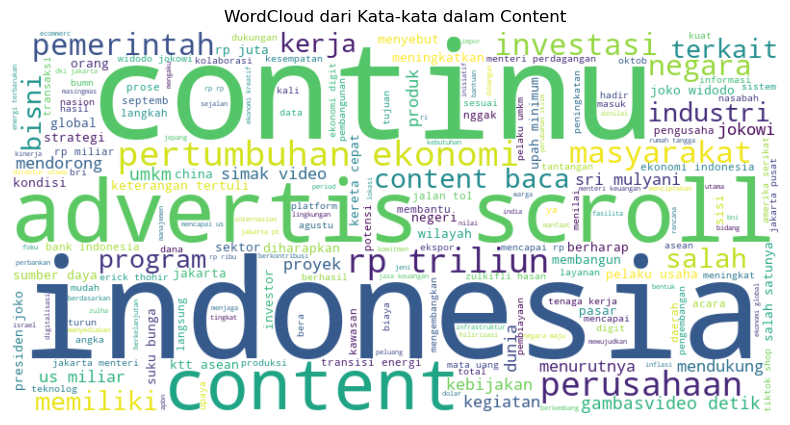

In [116]:
# Gabungkan semua kata menjadi satu string
all_words = ' '.join([' '.join(words) for words in df['processed_content']])

# Buat WordCloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(all_words)

# Tampilkan WordCloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('WordCloud dari Kata-kata dalam Content')
plt.show()

masih banyak kata kata yang seharusnya tidak masuk dalam konteks pemodelan LDA

## Data Preprocessing

### Data Cleaning

Cleaning data dari kata kata dan tanda baca yang tidak diperlukan pada pemodelan

In [117]:
# Download daftar stop words bahasa Indonesia dari NLTK
stop_words_indonesian = set(stopwords.words('indonesian'))

# Membersihkan kolom 'content'
def clean_content(text):
    # Hapus bagian iklan
    text = text.replace("ADVERTISEMENT", "").replace("SCROLL TO CONTINUE WITH CONTENT", "")

    # Hapus bagian "Baca juga:" beserta 7 kata setelahnya
    if "Baca juga:" in text:
        start_index = text.find("Baca juga:")
        end_index = start_index + len("Baca juga:")
        for _ in range(7):
            end_index = text.find(" ", end_index + 1)
            if end_index == -1:
                break
        if end_index != -1:
            text = text[:start_index] + text[end_index:]
        else:
            text = text[:start_index]

    # Tokenisasi teks
    tokens = word_tokenize(text)

    # Hapus stopwords dalam bahasa Indonesia
    tokens = [word for word in tokens if word.lower() not in stop_words_indonesian]

    # Hapus punctuation
    tokens = [word for word in tokens if word.isalnum()]

    # Gabungkan kembali tokens menjadi teks
    text = ' '.join(tokens)

    return text

# Terapkan fungsi pembersihan pada kolom 'content'
data['cleaned_content'] = data['content'].apply(clean_content)

In [118]:
## Sanity Check
data

,subject,url,title,post_date,post_by,content,cleaned_content
0,ekonomi,https://finance.detik.com/berita-ekonomi-bisni...,20 KEK RI Bakal Gelar Rakernas Bahas Percepata...,11 Des 2023 16:41,DetikFinance,\n\n\nJakarta - Sebanyak 20 Kawasan Ekonomi Kh...,Jakarta 20 Kawasan Ekonomi Khusus KEK Indonesi...
1,ekonomi,https://finance.detik.com/berita-ekonomi-bisni...,"Bicara Pemerataan, Ganjar Singgung Akses Tol h...",11 Des 2023 16:32,DetikFinance,\n\n\nJakarta - Calon Presiden (capres) Ganjar...,Jakarta Calon Presiden capres Ganjar Pranowo m...
2,ekonomi,https://finance.detik.com/berita-ekonomi-bisni...,"Jokowi Kumpulkan Para Menteri di Istana, Bahas...",11 Des 2023 15:48,DetikFinance,\n\n\nJakarta - Presiden Joko Widodo (Jokowi) ...,Jakarta Presiden Joko Widodo Jokowi memanggil ...
3,ekonomi,https://finance.detik.com/berita-ekonomi-bisni...,Besok Harbolnas! Sudah Bisa Belanja Lagi di Ti...,11 Des 2023 15:20,DetikFinance,\n\n\nJakarta - TikTok Shop hadir lagi. Hal in...,Jakarta TikTok Shop hadir PT GoTo Gojek Tokope...
4,ekonomi,https://finance.detik.com/berita-ekonomi-bisni...,"Dapat Nilai Bagus dari Kemenkumham, Menteri KP...",11 Des 2023 15:05,DetikFinance,\n\n\nJakarta - Kementerian Kelautan dan Perik...,Jakarta Kementerian Kelautan Perikanan KKP nil...
...,...,...,...,...,...,...,...
2490,ekonomi,https://finance.detik.com/berita-ekonomi-bisni...,Luhut Temui Bos IMF Usai Hilirisasi RI Disenti...,11 Agu 2023 12:56,DetikFinance,\n\n\nJakarta - Menteri Koordinator Bidang Kem...,Jakarta Menteri Koordinator Bidang Kemaritiman...
2491,ekonomi,https://finance.detik.com/berita-ekonomi-bisni...,Luhut Ungkap Startup RI Terbanyak Nomor 6 di D...,11 Agu 2023 12:31,DetikFinance,\n\n\nJakarta - Menteri Koordinator Bidang Kem...,Jakarta Menteri Koordinator Bidang Kemaritiman...
2492,ekonomi,https://finance.detik.com/moneter/d-6870675/by...,Bye-bye Dolar AS! RI Mulai Pakai Mata Uang Lai...,11 Agu 2023 12:26,DetikFinance,\n\n\nJakarta - Indonesia terus mengembangkan ...,Jakarta Indonesia mengembangkan program transa...
2493,ekonomi,https://finance.detik.com/berita-ekonomi-bisni...,"Peringatan Hari UMKM Nasional di Solo Dibuka, ...",11 Agu 2023 11:20,DetikFinance,\nJakarta - Perayaan Hari UMKM Nasional Expo ...,Jakarta Perayaan UMKM Nasional Expo 2023 dibuk...


### Tokenisasi Teks

Tokenisasi adalah langkah penting dalam pemrosesan teks untuk menguraikan teks menjadi unit-unit yang lebih kecil (token) agar dapat diolah lebih lanjut.

In [119]:
# Fungsi untuk melakukan tokenisasi
def tokenize_text(text):
    return word_tokenize(text)

# Menerapkan fungsi tokenisasi pada kolom 'content' dan membuat kolom baru 'tokenized_content'
data['tokenized_content'] = data['cleaned_content'].apply(tokenize_text)

In [120]:
# Sanity check
data

,subject,url,title,post_date,post_by,content,cleaned_content,tokenized_content
0,ekonomi,https://finance.detik.com/berita-ekonomi-bisni...,20 KEK RI Bakal Gelar Rakernas Bahas Percepata...,11 Des 2023 16:41,DetikFinance,\n\n\nJakarta - Sebanyak 20 Kawasan Ekonomi Kh...,Jakarta 20 Kawasan Ekonomi Khusus KEK Indonesi...,"[Jakarta, 20, Kawasan, Ekonomi, Khusus, KEK, I..."
1,ekonomi,https://finance.detik.com/berita-ekonomi-bisni...,"Bicara Pemerataan, Ganjar Singgung Akses Tol h...",11 Des 2023 16:32,DetikFinance,\n\n\nJakarta - Calon Presiden (capres) Ganjar...,Jakarta Calon Presiden capres Ganjar Pranowo m...,"[Jakarta, Calon, Presiden, capres, Ganjar, Pra..."
2,ekonomi,https://finance.detik.com/berita-ekonomi-bisni...,"Jokowi Kumpulkan Para Menteri di Istana, Bahas...",11 Des 2023 15:48,DetikFinance,\n\n\nJakarta - Presiden Joko Widodo (Jokowi) ...,Jakarta Presiden Joko Widodo Jokowi memanggil ...,"[Jakarta, Presiden, Joko, Widodo, Jokowi, mema..."
3,ekonomi,https://finance.detik.com/berita-ekonomi-bisni...,Besok Harbolnas! Sudah Bisa Belanja Lagi di Ti...,11 Des 2023 15:20,DetikFinance,\n\n\nJakarta - TikTok Shop hadir lagi. Hal in...,Jakarta TikTok Shop hadir PT GoTo Gojek Tokope...,"[Jakarta, TikTok, Shop, hadir, PT, GoTo, Gojek..."
4,ekonomi,https://finance.detik.com/berita-ekonomi-bisni...,"Dapat Nilai Bagus dari Kemenkumham, Menteri KP...",11 Des 2023 15:05,DetikFinance,\n\n\nJakarta - Kementerian Kelautan dan Perik...,Jakarta Kementerian Kelautan Perikanan KKP nil...,"[Jakarta, Kementerian, Kelautan, Perikanan, KK..."
...,...,...,...,...,...,...,...,...
2490,ekonomi,https://finance.detik.com/berita-ekonomi-bisni...,Luhut Temui Bos IMF Usai Hilirisasi RI Disenti...,11 Agu 2023 12:56,DetikFinance,\n\n\nJakarta - Menteri Koordinator Bidang Kem...,Jakarta Menteri Koordinator Bidang Kemaritiman...,"[Jakarta, Menteri, Koordinator, Bidang, Kemari..."
2491,ekonomi,https://finance.detik.com/berita-ekonomi-bisni...,Luhut Ungkap Startup RI Terbanyak Nomor 6 di D...,11 Agu 2023 12:31,DetikFinance,\n\n\nJakarta - Menteri Koordinator Bidang Kem...,Jakarta Menteri Koordinator Bidang Kemaritiman...,"[Jakarta, Menteri, Koordinator, Bidang, Kemari..."
2492,ekonomi,https://finance.detik.com/moneter/d-6870675/by...,Bye-bye Dolar AS! RI Mulai Pakai Mata Uang Lai...,11 Agu 2023 12:26,DetikFinance,\n\n\nJakarta - Indonesia terus mengembangkan ...,Jakarta Indonesia mengembangkan program transa...,"[Jakarta, Indonesia, mengembangkan, program, t..."
2493,ekonomi,https://finance.detik.com/berita-ekonomi-bisni...,"Peringatan Hari UMKM Nasional di Solo Dibuka, ...",11 Agu 2023 11:20,DetikFinance,\nJakarta - Perayaan Hari UMKM Nasional Expo ...,Jakarta Perayaan UMKM Nasional Expo 2023 dibuk...,"[Jakarta, Perayaan, UMKM, Nasional, Expo, 2023..."


## Postag content dengan all_indo_man_tag_corpus_model

tokenisasi dan part-of-speech tagging (postagging) pada teks dalam kolom 'cleaned_content' dari tabel data menggunakan Conditional Random Field (CRF) Tagger dari NLTK. Postagging berguna dalam analisis teks, terutama dalam pemahaman struktur kalimat dan pengidentifikasian peran kata dalam konteksnya (misalnya, apakah kata tersebut merupakan kata benda, kata kerja, kata sifat, atau kata keterangan).

In [121]:
# Mengunduh model CRF tagger untuk Bahasa Indonesia
ct = CRFTagger()
ct.set_model_file('all_indo_man_tag_corpus_model.crf.tagger')

# Fungsi untuk melakukan tokenisasi dan postagging
def postag_text(text):
    # Tokenisasi teks
    tokens = word_tokenize(text)

    # Melakukan postagging menggunakan CRFTagger
    postags = ct.tag_sents([tokens])

    return postags[0]  # Kembalikan hasil postag untuk teks pertama

# Terapkan fungsi postagging pada kolom 'content'
data['postag_content'] = data['cleaned_content'].apply(postag_text)

In [122]:
# Tampilkan hasil postagging
data[['cleaned_content', 'postag_content']]

,cleaned_content,postag_content
0,Jakarta 20 Kawasan Ekonomi Khusus KEK Indonesi...,"[(Jakarta, NNP), (20, CD), (Kawasan, NN), (Eko..."
1,Jakarta Calon Presiden capres Ganjar Pranowo m...,"[(Jakarta, NNP), (Calon, NNP), (Presiden, NNP)..."
2,Jakarta Presiden Joko Widodo Jokowi memanggil ...,"[(Jakarta, NNP), (Presiden, NNP), (Joko, NNP),..."
3,Jakarta TikTok Shop hadir PT GoTo Gojek Tokope...,"[(Jakarta, NNP), (TikTok, NNP), (Shop, NNP), (..."
4,Jakarta Kementerian Kelautan Perikanan KKP nil...,"[(Jakarta, NNP), (Kementerian, NNP), (Kelautan..."
...,...,...
2490,Jakarta Menteri Koordinator Bidang Kemaritiman...,"[(Jakarta, NNP), (Menteri, NNP), (Koordinator,..."
2491,Jakarta Menteri Koordinator Bidang Kemaritiman...,"[(Jakarta, NNP), (Menteri, NNP), (Koordinator,..."
2492,Jakarta Indonesia mengembangkan program transa...,"[(Jakarta, NNP), (Indonesia, NNP), (mengembang..."
2493,Jakarta Perayaan UMKM Nasional Expo 2023 dibuk...,"[(Jakarta, NNP), (Perayaan, NNP), (UMKM, NNP),..."


## Melakukan Indexed Content

membuat kolom baru ('indexed_content') yang berisi kata-kata yang telah dipilih berdasarkan tag tertentu (NN, VB, JJ, RB) dari hasil postagging pada kolom 'postag_content

In [123]:
def get_selected_tags(tokens_with_tags):
    selected_tags = ['NN', 'VB', 'JJ', 'RB']
    return [text for text, tag in tokens_with_tags if tag in selected_tags]

# Terapkan fungsi pada kolom 'postag_content'
data['indexed_content'] = data['postag_content'].apply(get_selected_tags)

In [124]:
data

,subject,url,title,post_date,post_by,content,cleaned_content,tokenized_content,postag_content,indexed_content
0,ekonomi,https://finance.detik.com/berita-ekonomi-bisni...,20 KEK RI Bakal Gelar Rakernas Bahas Percepata...,11 Des 2023 16:41,DetikFinance,\n\n\nJakarta - Sebanyak 20 Kawasan Ekonomi Kh...,Jakarta 20 Kawasan Ekonomi Khusus KEK Indonesi...,"[Jakarta, 20, Kawasan, Ekonomi, Khusus, KEK, I...","[(Jakarta, NNP), (20, CD), (Kawasan, NN), (Eko...","[Kawasan, Ekonomi, menggelar, membahas, upaya,..."
1,ekonomi,https://finance.detik.com/berita-ekonomi-bisni...,"Bicara Pemerataan, Ganjar Singgung Akses Tol h...",11 Des 2023 16:32,DetikFinance,\n\n\nJakarta - Calon Presiden (capres) Ganjar...,Jakarta Calon Presiden capres Ganjar Pranowo m...,"[Jakarta, Calon, Presiden, capres, Ganjar, Pra...","[(Jakarta, NNP), (Calon, NNP), (Presiden, NNP)...","[menyinggung, pemerataan, mengaku, dicurhati, ..."
2,ekonomi,https://finance.detik.com/berita-ekonomi-bisni...,"Jokowi Kumpulkan Para Menteri di Istana, Bahas...",11 Des 2023 15:48,DetikFinance,\n\n\nJakarta - Presiden Joko Widodo (Jokowi) ...,Jakarta Presiden Joko Widodo Jokowi memanggil ...,"[Jakarta, Presiden, Joko, Widodo, Jokowi, mema...","[(Jakarta, NNP), (Presiden, NNP), (Joko, NNP),...","[memanggil, menterinya, siang, dipanggil, meng..."
3,ekonomi,https://finance.detik.com/berita-ekonomi-bisni...,Besok Harbolnas! Sudah Bisa Belanja Lagi di Ti...,11 Des 2023 15:20,DetikFinance,\n\n\nJakarta - TikTok Shop hadir lagi. Hal in...,Jakarta TikTok Shop hadir PT GoTo Gojek Tokope...,"[Jakarta, TikTok, Shop, hadir, PT, GoTo, Gojek...","[(Jakarta, NNP), (TikTok, NNP), (Shop, NNP), (...","[hadir, menjalin, kemitraan, keterangan, resmi..."
4,ekonomi,https://finance.detik.com/berita-ekonomi-bisni...,"Dapat Nilai Bagus dari Kemenkumham, Menteri KP...",11 Des 2023 15:05,DetikFinance,\n\n\nJakarta - Kementerian Kelautan dan Perik...,Jakarta Kementerian Kelautan Perikanan KKP nil...,"[Jakarta, Kementerian, Kelautan, Perikanan, KK...","[(Jakarta, NNP), (Kementerian, NNP), (Kelautan...","[nilai, aspek, reformasi, hukum, mengaku, keri..."
...,...,...,...,...,...,...,...,...,...,...
2490,ekonomi,https://finance.detik.com/berita-ekonomi-bisni...,Luhut Temui Bos IMF Usai Hilirisasi RI Disenti...,11 Agu 2023 12:56,DetikFinance,\n\n\nJakarta - Menteri Koordinator Bidang Kem...,Jakarta Menteri Koordinator Bidang Kemaritiman...,"[Jakarta, Menteri, Koordinator, Bidang, Kemari...","[(Jakarta, NNP), (Menteri, NNP), (Koordinator,...","[menemui, pertemuan, membahas, kebijakan, meni..."
2491,ekonomi,https://finance.detik.com/berita-ekonomi-bisni...,Luhut Ungkap Startup RI Terbanyak Nomor 6 di D...,11 Agu 2023 12:31,DetikFinance,\n\n\nJakarta - Menteri Koordinator Bidang Kem...,Jakarta Menteri Koordinator Bidang Kemaritiman...,"[Jakarta, Menteri, Koordinator, Bidang, Kemari...","[(Jakarta, NNP), (Menteri, NNP), (Koordinator,...","[mengungkap, startup, mengalami, perkembangan,..."
2492,ekonomi,https://finance.detik.com/moneter/d-6870675/by...,Bye-bye Dolar AS! RI Mulai Pakai Mata Uang Lai...,11 Agu 2023 12:26,DetikFinance,\n\n\nJakarta - Indonesia terus mengembangkan ...,Jakarta Indonesia mengembangkan program transa...,"[Jakarta, Indonesia, mengembangkan, program, t...","[(Jakarta, NNP), (Indonesia, NNP), (mengembang...","[mengembangkan, program, transaksi, mata, uang..."
2493,ekonomi,https://finance.detik.com/berita-ekonomi-bisni...,"Peringatan Hari UMKM Nasional di Solo Dibuka, ...",11 Agu 2023 11:20,DetikFinance,\nJakarta - Perayaan Hari UMKM Nasional Expo ...,Jakarta Perayaan UMKM Nasional Expo 2023 dibuk...,"[Jakarta, Perayaan, UMKM, Nasional, Expo, 2023...","[(Jakarta, NNP), (Perayaan, NNP), (UMKM, NNP),...","[dibuka, Rencananya, UMKM, Nasional, diresmika..."


## Menggabungkan Kata-kata Terpilih ke dalam Teks Lemmatized

membuat kolom baru 'lemmas_to_content' yang berisi teks yang telah digabungkan dari kata-kata yang dipilih berdasarkan tag dalam kolom 'indexed_content'.

In [125]:
# Menggabungkan lema ke dalam teks
data['lemmas_to_content'] = data['indexed_content'].apply(lambda lemmas: ' '.join(map(str, lemmas)))

In [126]:
data

,subject,url,title,post_date,post_by,content,cleaned_content,tokenized_content,postag_content,indexed_content,lemmas_to_content
0,ekonomi,https://finance.detik.com/berita-ekonomi-bisni...,20 KEK RI Bakal Gelar Rakernas Bahas Percepata...,11 Des 2023 16:41,DetikFinance,\n\n\nJakarta - Sebanyak 20 Kawasan Ekonomi Kh...,Jakarta 20 Kawasan Ekonomi Khusus KEK Indonesi...,"[Jakarta, 20, Kawasan, Ekonomi, Khusus, KEK, I...","[(Jakarta, NNP), (20, CD), (Kawasan, NN), (Eko...","[Kawasan, Ekonomi, menggelar, membahas, upaya,...",Kawasan Ekonomi menggelar membahas upaya mempe...
1,ekonomi,https://finance.detik.com/berita-ekonomi-bisni...,"Bicara Pemerataan, Ganjar Singgung Akses Tol h...",11 Des 2023 16:32,DetikFinance,\n\n\nJakarta - Calon Presiden (capres) Ganjar...,Jakarta Calon Presiden capres Ganjar Pranowo m...,"[Jakarta, Calon, Presiden, capres, Ganjar, Pra...","[(Jakarta, NNP), (Calon, NNP), (Presiden, NNP)...","[menyinggung, pemerataan, mengaku, dicurhati, ...",menyinggung pemerataan mengaku dicurhati merat...
2,ekonomi,https://finance.detik.com/berita-ekonomi-bisni...,"Jokowi Kumpulkan Para Menteri di Istana, Bahas...",11 Des 2023 15:48,DetikFinance,\n\n\nJakarta - Presiden Joko Widodo (Jokowi) ...,Jakarta Presiden Joko Widodo Jokowi memanggil ...,"[Jakarta, Presiden, Joko, Widodo, Jokowi, mema...","[(Jakarta, NNP), (Presiden, NNP), (Joko, NNP),...","[memanggil, menterinya, siang, dipanggil, meng...",memanggil menterinya siang dipanggil mengikuti...
3,ekonomi,https://finance.detik.com/berita-ekonomi-bisni...,Besok Harbolnas! Sudah Bisa Belanja Lagi di Ti...,11 Des 2023 15:20,DetikFinance,\n\n\nJakarta - TikTok Shop hadir lagi. Hal in...,Jakarta TikTok Shop hadir PT GoTo Gojek Tokope...,"[Jakarta, TikTok, Shop, hadir, PT, GoTo, Gojek...","[(Jakarta, NNP), (TikTok, NNP), (Shop, NNP), (...","[hadir, menjalin, kemitraan, keterangan, resmi...",hadir menjalin kemitraan keterangan resminya k...
4,ekonomi,https://finance.detik.com/berita-ekonomi-bisni...,"Dapat Nilai Bagus dari Kemenkumham, Menteri KP...",11 Des 2023 15:05,DetikFinance,\n\n\nJakarta - Kementerian Kelautan dan Perik...,Jakarta Kementerian Kelautan Perikanan KKP nil...,"[Jakarta, Kementerian, Kelautan, Perikanan, KK...","[(Jakarta, NNP), (Kementerian, NNP), (Kelautan...","[nilai, aspek, reformasi, hukum, mengaku, keri...",nilai aspek reformasi hukum mengaku keringat d...
...,...,...,...,...,...,...,...,...,...,...,...
2490,ekonomi,https://finance.detik.com/berita-ekonomi-bisni...,Luhut Temui Bos IMF Usai Hilirisasi RI Disenti...,11 Agu 2023 12:56,DetikFinance,\n\n\nJakarta - Menteri Koordinator Bidang Kem...,Jakarta Menteri Koordinator Bidang Kemaritiman...,"[Jakarta, Menteri, Koordinator, Bidang, Kemari...","[(Jakarta, NNP), (Menteri, NNP), (Koordinator,...","[menemui, pertemuan, membahas, kebijakan, meni...",menemui pertemuan membahas kebijakan meningkat...
2491,ekonomi,https://finance.detik.com/berita-ekonomi-bisni...,Luhut Ungkap Startup RI Terbanyak Nomor 6 di D...,11 Agu 2023 12:31,DetikFinance,\n\n\nJakarta - Menteri Koordinator Bidang Kem...,Jakarta Menteri Koordinator Bidang Kemaritiman...,"[Jakarta, Menteri, Koordinator, Bidang, Kemari...","[(Jakarta, NNP), (Menteri, NNP), (Koordinator,...","[mengungkap, startup, mengalami, perkembangan,...",mengungkap startup mengalami perkembangan Berd...
2492,ekonomi,https://finance.detik.com/moneter/d-6870675/by...,Bye-bye Dolar AS! RI Mulai Pakai Mata Uang Lai...,11 Agu 2023 12:26,DetikFinance,\n\n\nJakarta - Indonesia terus mengembangkan ...,Jakarta Indonesia mengembangkan program transa...,"[Jakarta, Indonesia, mengembangkan, program, t...","[(Jakarta, NNP), (Indonesia, NNP), (mengembang...","[mengembangkan, program, transaksi, mata, uang...",mengembangkan program transaksi mata uang loka...
2493,ekonomi,https://finance.detik.com/berita-ekonomi-bisni...,"Peringatan Hari UMKM Nasional di Solo Dibuka, ...",11 Agu 2023 11:20,DetikFinance,\nJakarta - Perayaan Hari UMKM Nasional Expo ...,Jakarta Perayaan UMKM Nasional Expo 20

## Filtering Extremes pada Kamus Kata untuk Analisis Topic Modeling

kamus (id2word) yang telah difilter untuk menghilangkan kata-kata yang kurang umum atau terlalu umum. Proses ini merupakan langkah persiapan data penting dalam pemodelan topic menggunakan metode Latent Dirichlet Allocation (LDA)

In [127]:
# Membuat kamus id2word
id2word = Dictionary(data['indexed_content'])

# Menampilkan jumlah kata sebelum filtering extremes
print("Jumlah kata sebelum filtering extremes:", len(id2word))

# Filtering Extremes
id2word.filter_extremes(no_below=2, no_above=0.99)

# Menampilkan jumlah kata setelah filtering extremes
print("Jumlah kata setelah filtering extremes:", len(id2word))

Jumlah kata sebelum filtering extremes: 16878
Jumlah kata setelah filtering extremes: 9865


## Membangun Model Bigram dan Trigram untuk Pemrosesan Teks

Bigram dan Trigram digunakan untuk mendeteksi pasangan kata yang sering muncul bersama, membentuk entitas yang lebih bermakna. Kemudian, script ini menambahkan bigram dan trigram yang terdeteksi ke dalam kolom 'indexed_content' 

In [128]:
from gensim.models import Phrases

# Membuat Bigram & Trigram Models
bigram = Phrases(data['indexed_content'], min_count=5, threshold=100)
trigram = Phrases(bigram[data['indexed_content']], threshold=100)

# Mendeteksi bigram dan trigram, kemudian menambahkannya ke dalam 'indexed_content'
for idx, content in enumerate(data['indexed_content']):
    data['indexed_content'][idx] += [token for token in bigram[content] if '_' in token]
    data['indexed_content'][idx] += [token for token in trigram[bigram[content]] if '_' in token]

## Membangun Representasi Dokumen dengan Model Bag-of-Words

Objek corpus ini berisi representasi dokumen-dokumen dari data['indexed_content'] dalam format bag-of-words, di mana setiap kata memiliki ID dan dihitung berapa kali muncul dalam setiap dokumen.

In [129]:
# Membuat objek corpus
corpus = [id2word.doc2bow(tokens) for tokens in data['indexed_content']]

## Implementasi Topic Modeling dengan Latent Dirichlet Allocation (LDA)

menggunakan Gensim untuk melatih model Topic Modeling menggunakan algoritma Latent Dirichlet Allocation (LDA) pada korpus dokumen yang telah dipersiapkan sebelumnya.

In [130]:
# Inisiasi jumlah topik
num_topics = 5

# Inisiasi model dasar
lda_model = LdaMulticore(corpus=corpus, num_topics=num_topics, id2word=id2word, 
                         workers=8, passes=8, alpha='symmetric', eta='auto', 
                         random_state=42, iterations=500, eval_every=10, chunksize=100)

## Ekstraksi Kata Kunci dari Model Topic Modeling menggunakan LDA

daftar kata kunci untuk setiap topik

In [131]:
# membuat daftar kata kunci untuk setiap topik 
words_multicore = [re.findall(r'"([^"]*)"', t[1]) for t in lda_model.print_topics()]

## Pembentukan Topik dari Kata Kunci Model Topic Modeling menggunakan LDA

menggabungkan kata kunci dari model Topic Modeling yang dihasilkan sebelumnya menjadi topik-topik yang lebih mudah dibaca.
topics_multicore akan berisi daftar topik-topik yang terbentuk dari gabungan kata kunci.

In [132]:
# Pembentukan Topik dari Kata Kunci Model Topic Modeling
topics_multicore = [' '.join(t[0:num_topics]) for t in words_multicore]

## Menampilkan Topik dari Model Topic Modeling menggunakan LDA

menampilkan setiap topik yang telah dibentuk dari model Topic Modeling menggunakan LDA.

In [133]:
# menampilkan setiap topik yang sudah dibentuk
for id, t in enumerate(topics_multicore): 
    print(f"------ Topic {id} ------")
    print(t, end="\n\n")

------ Topic 0 ------
ekonomi negara pertumbuhan investasi pemerintah

------ Topic 1 ------
kerja masyarakat pertemuan ekonomi negara

------ Topic 2 ------
UMKM ekonomi produk masyarakat tol

------ Topic 3 ------
energi ekonomi perusahaan harga masyarakat

------ Topic 4 ------
keuangan digital UMKM ekonomi usaha



## Mengevaluasi Kualitas Model Topic Modeling menggunakan Perplexity dan Coherence Score

- `Perplexity` mengukur sejauh mana model dapat memberikan prediksi yang baik, di mana nilai yang lebih rendah dianggap lebih baik.
- `Coherence Score` mengukur sejauh mana interpretasi topik oleh model konsisten dan bermakna, di mana nilai yang lebih tinggi dianggap lebih baik.

In [134]:
# Menghitung Perplexity
# suatu metrik yang mengukur seberapa baik model ini dapat memprediksi korpus; semakin rendah, semakin baik
perplexity_multicore = lda_model.log_perplexity(corpus)
print('\nPerplexity Multicore: ', perplexity_multicore) 

# Menghitung Coherence Score
# suatu metrik yang mengukur seberapa konsisten topik-topik yang dihasilkan oleh model LDA; semakin tinggi, semakin baik
coherence_multicore = CoherenceModel(model=lda_model, texts=data['indexed_content'], 
                                     dictionary=id2word, coherence='c_v')

coherence_multicore = coherence_multicore.get_coherence()
print('\nCoherence Score Multicore: ', coherence_multicore)


Perplexity Multicore:  -7.591725695395868

Coherence Score Multicore:  0.36679672988027556


## Representasi Angka dari Teks menggunakan Count Vectorizer

mengubah teks yang telah diolah sebelumnya (dalam bentuk lema) menjadi representasi angka.

In [135]:
# Membuat objek CountVectorizer
vectorizer = CountVectorizer()

# Melakukan vektorisasi pada teks yang telah diolah lematizenya
data_vectorized = vectorizer.fit_transform(data['lemmas_to_content'])

## Evaluasi sejumlah model Latent Dirichlet Allocation (LDA) 

fungsi compute_coherence_values yang digunakan untuk mengevaluasi sejumlah model Latent Dirichlet Allocation (LDA) dengan jumlah topik yang berbeda-beda

In [136]:
def compute_coherence_values(dictionary, corpus, texts, limit, start=2, step=3):
    """
    Menghitung kohesi c_v untuk berbagai jumlah topik

    Parameters:
    ----------
    dictionary : Gensim dictionary
    corpus : Gensim corpus
    texts : List of input texts
    limit : Jumlah maksimum topik

    Returns:
    -------
    model_list : List of LDA topic models
    coherence_values : Nilai kohesi yang sesuai dengan model LDA dengan jumlah topik tertentu
    """
    coherence_values = []
    model_list = []
    for num_topics in range(start, limit, step):
        model = LdaMulticore(corpus=corpus, num_topics=num_topics, id2word=id2word, 
                             workers=8, passes=25, alpha=0.1, eta=0.001, decay=0.5,
                             random_state=123, iterations=500, eval_every=10, chunksize=2000)
        model_list.append(model)
        coherencemodel = CoherenceModel(model=model, texts=texts, dictionary=dictionary, coherence='c_v')
        coherence_values.append(coherencemodel.get_coherence())

    return model_list, coherence_values

In [137]:
# menjalankan compute_coherence_values fungsi yang telah dibuat 
limit=5; start=1; step=2
model_list, coherence_values = compute_coherence_values(dictionary=id2word, corpus=corpus, texts=data['indexed_content'], 
                                                        start = start, limit = limit, step = step)

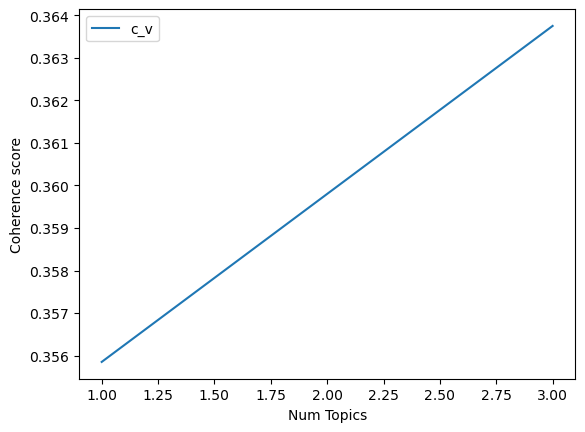

In [138]:
# Membuat plot untuk menunjukkan nilai koherensi untuk berbagai jumlah topik.
x = range(start, limit, step)
plt.plot(x, coherence_values)
plt.xlabel("Num Topics")
plt.ylabel("Coherence score")
plt.legend(['c_v'], loc='best')
plt.show()


In [139]:
# menampilkan coherence score
for m, cv in zip(x, coherence_values):
    print("Num Topics =", m, " has Coherence Value of", round(cv, 4))

Num Topics = 1  has Coherence Value of 0.3559
Num Topics = 3  has Coherence Value of 0.3637


In [140]:
# pilih model
optimal_model = model_list[1]
model_topics = optimal_model.show_topics(formatted=False)
opt_model = len(model_topics)
print(opt_model)

3


## Inisialisasi dan Pelatihan Model LDA untuk Analisis Topik

menciptakan model LDA yang dapat digunakan untuk analisis topik pada dataset tertentu.

In [141]:
# inisialisasi base model
model_x = LdaMulticore(corpus = corpus, num_topics = opt_model, id2word = id2word, 
                       workers = 8, passes = 25, alpha = 0.1, eta = 0.01, decay = 0.5,
                       random_state = 123, iterations = 500, eval_every = 10, chunksize = 2000)

## Visualisasi Topic

memberikan visualisasi yang interaktif dan intuitif terhadap topik-topik yang telah diidentifikasi oleh model LDA. Visualisasi ini dapat membantu pemahaman tentang distribusi topik dalam dataset dan interaksi antara topik-topik

In [142]:
# visualisasi topic
import pyLDAvis.gensim_models
pyLDAvis.enable_notebook()
pyLDAvis.gensim_models.prepare(model_x, corpus, id2word)

PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
1      0.133198  0.087681       1        1  49.148138
0      0.027968 -0.136464       2        1  30.503941
2     -0.161166  0.048784       3        1  20.347921, topic_info=             Term         Freq        Total Category  logprob  loglift
90         negara  2759.000000  2759.000000  Default  30.0000  30.0000
891         bunga   762.000000   762.000000  Default  29.0000  29.0000
136          UMKM  1830.000000  1830.000000  Default  28.0000  28.0000
46    pertumbuhan  2056.000000  2056.000000  Default  27.0000  27.0000
583          uang   713.000000   713.000000  Default  26.0000  26.0000
...           ...          ...          ...      ...      ...      ...
42     pemerintah   366.427584  1992.286598   Topic3  -5.2257  -0.1010
12        ekonomi   490.292977  5258.639910   Topic3  -4.9345  -0.7804
252         nilai   260.065469   944.504142   Topic3  -5.5686   0.3025
1176        orang   237.938989   800.796830   Topic3  -5.6575   0.3786
166      keuangan   230.350473  1292.722270   Topic3  -5.6899  -0.1327

[291 rows x 6 columns], token_table=      Topic      Freq         Term
term                              
1857      2  0.958803         APBN
1857      3  0.040446         APBN
7913      2  1.003941        BPHTB
2093      3  0.997652          BPR
3766      2  1.004056        Impor
...     ...       ...          ...
352       3  0.064911        usaha
2031      2  0.760940        utang
2031      3  0.236058        utang
7932      3  0.995283  wanprestasi
1272      1  0.996950     waralaba

[474 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[2, 1, 3])

## Membuat DataFrame yang berisi informasi tentang topik dominan, kontribusi persentase, dan kata kunci topik untuk setiap dokumen

In [143]:
def format_topics_sentences(ldamodel, corpus, texts):
    # Inisialisasi output
    sent_topics_df = pd.DataFrame()

    # Mendapatkan topik utama dalam setiap dokumen
    for i, row in enumerate(ldamodel[corpus]):
        row = sorted(row, key=lambda x: (x[1]), reverse=True)
        # Mendapatkan Dominant topic, Perc Contribution, dan Keywords untuk setiap dokumen
        for j, (topic_num, prop_topic) in enumerate(row):
            if j == 0:  # => topik dominan
                wp = ldamodel.show_topic(topic_num)
                topic_keywords = ", ".join([word for word, prop in wp])
                sent_topics_df = pd.concat([sent_topics_df, pd.DataFrame([[int(topic_num), round(prop_topic, 4), topic_keywords]])], ignore_index=True)
            else:
                break

    sent_topics_df.columns = ['Dominant_Topic', 'Perc_Contribution', 'Topic_Keywords']

    # Menambahkan teks asli ke output
    contents = pd.Series(texts)
    sent_topics_df = pd.concat([sent_topics_df, contents], axis=1)
    return sent_topics_df

# implementasi fungsi
df_topic_keywords = format_topics_sentences(ldamodel=model_x, corpus=corpus, texts=data['lemmas_to_content'])

In [144]:
# Memberikan label berdasarkan kata kunci hasil modeling
topics = {0:'Mikroekonomi', 1:'Makroekonomi', 2:"Ekonomi Keuangan dan Infrastruktur"}

In [145]:
# Menyiapkan DataFrame untuk disimpan dengan mereset indeks dan menamai kolom-kolomnya.
df_save = df_topic_keywords.reset_index()
# mengambil kolom kolom yang ingin ditampilkan
df_save.columns = ['post_date', 'Dominant_Topic', 'Topic_Perc_Contrib','Keywords', 'lemmas_to_content']
# mengembalikan tanggal pada tabel data yang digunakan untuk tabel baru pada df_save
df_save.post_date = data['post_date']
# Menambahkan kolom 'topic' dengan map ke topik-teks
df_save['topic'] = df_save['Dominant_Topic'].map(topics) 

In [146]:
# sanity check
df_save

,post_date,Dominant_Topic,Topic_Perc_Contrib,Keywords,lemmas_to_content,topic
0,11 Des 2023 16:41,1,0.9979,"ekonomi, UMKM, kerja, energi, produk, masyarak...",Kawasan Ekonomi menggelar membahas upaya mempe...,Makroekonomi
1,11 Des 2023 16:32,0,0.6022,"ekonomi, negara, pertumbuhan, pemerintah, menc...",menyinggung pemerataan mengaku dicurhati merat...,Mikroekonomi
2,11 Des 2023 15:48,0,0.9962,"ekonomi, negara, pertumbuhan, pemerintah, menc...",memanggil menterinya siang dipanggil mengikuti...,Mikroekonomi
3,11 Des 2023 15:20,1,0.9980,"ekonomi, UMKM, kerja, energi, produk, masyarak...",hadir menjalin kemitraan keterangan resminya k...,Makroekonomi
4,11 Des 2023 15:05,2,0.5170,"bunga, uang, harga, masyarakat, ekonomi, pasar...",nilai aspek reformasi hukum mengaku keringat d...,Ekonomi Keuangan dan Infrastruktur
...,...,...,...,...,...,...
2490,11 Agu 2023 12:56,1,0.5527,"ekonomi, UMKM, kerja, energi, produk, masyarak...",menemui pertemuan membahas kebijakan meningkat...,Makroekonomi
2491,11 Agu 2023 12:31,1,0.7613,"ekonomi, UMKM, kerja, energi, produk, masyarak...",mengungkap startup mengalami perkembangan Berd...,Makroekonomi
2492,11 Agu 2023 12:26,2,0.4441,"bunga, uang, harga, masyarakat, ekonomi, pasar...",mengembangkan program transaksi mata uang loka...,Ekonomi Keuangan dan Infrastruktur
2493,11 Agu 2023 11:20,1,0.9988,"ekonomi, UMKM, kerja, energi, produk, masyarak...",dibuka Rencananya UMKM Nasional diresmikan dih...,Makroekonomi


In [147]:
# Menggabungkan data dan df_save
df_save = pd.concat([data,df_save], axis=1)

In [148]:
df_save

,subject,url,title,post_date,post_by,content,cleaned_content,tokenized_content,postag_content,indexed_content,lemmas_to_content,post_date,Dominant_Topic,Topic_Perc_Contrib,Keywords,lemmas_to_content,topic
0,ekonomi,https://finance.detik.com/berita-ekonomi-bisni...,20 KEK RI Bakal Gelar Rakernas Bahas Percepata...,11 Des 2023 16:41,DetikFinance,\n\n\nJakarta - Sebanyak 20 Kawasan Ekonomi Kh...,Jakarta 20 Kawasan Ekonomi Khusus KEK Indonesi...,"[Jakarta, 20, Kawasan, Ekonomi, Khusus, KEK, I...","[(Jakarta, NNP), (20, CD), (Kawasan, NN), (Eko...","[Kawasan, Ekonomi, menggelar, membahas, upaya,...",Kawasan Ekonomi menggelar membahas upaya mempe...,11 Des 2023 16:41,1,0.9979,"ekonomi, UMKM, kerja, energi, produk, masyarak...",Kawasan Ekonomi menggelar membahas upaya mempe...,Makroekonomi
1,ekonomi,https://finance.detik.com/berita-ekonomi-bisni...,"Bicara Pemerataan, Ganjar Singgung Akses Tol h...",11 Des 2023 16:32,DetikFinance,\n\n\nJakarta - Calon Presiden (capres) Ganjar...,Jakarta Calon Presiden capres Ganjar Pranowo m...,"[Jakarta, Calon, Presiden, capres, Ganjar, Pra...","[(Jakarta, NNP), (Calon, NNP), (Presiden, NNP)...","[menyinggung, pemerataan, mengaku, dicurhati, ...",menyinggung pemerataan mengaku dicurhati merat...,11 Des 2023 16:32,0,0.6022,"ekonomi, negara, pertumbuhan, pemerintah, menc...",menyinggung pemerataan mengaku dicurhati merat...,Mikroekonomi
2,ekonomi,https://finance.detik.com/berita-ekonomi-bisni...,"Jokowi Kumpulkan Para Menteri di Istana, Bahas...",11 Des 2023 15:48,DetikFinance,\n\n\nJakarta - Presiden Joko Widodo (Jokowi) ...,Jakarta Presiden Joko Widodo Jokowi memanggil ...,"[Jakarta, Presiden, Joko, Widodo, Jokowi, mema...","[(Jakarta, NNP), (Presiden, NNP), (Joko, NNP),...","[memanggil, menterinya, siang, dipanggil, meng...",memanggil menterinya siang dipanggil mengikuti...,11 Des 2023 15:48,0,0.9962,"ekonomi, negara, pertumbuhan, pemerintah, menc...",memanggil menterinya siang dipanggil mengikuti...,Mikroekonomi
3,ekonomi,https://finance.detik.com/berita-ekonomi-bisni...,Besok Harbolnas! Sudah Bisa Belanja Lagi di Ti...,11 Des 2023 15:20,DetikFinance,\n\n\nJakarta - TikTok Shop hadir lagi. Hal in...,Jakarta TikTok Shop hadir PT GoTo Gojek Tokope...,"[Jakarta, TikTok, Shop, hadir, PT, GoTo, Gojek...","[(Jakarta, NNP), (TikTok, NNP), (Shop, NNP), (...","[hadir, menjalin, kemitraan, keterangan, resmi...",hadir menjalin kemitraan keterangan resminya k...,11 Des 2023 15:20,1,0.9980,"ekonomi, UMKM, kerja, energi, produk, masyarak...",hadir menjalin kemitraan keterangan resminya k...,Makroekonomi
4,ekonomi,https://finance.detik.com/berita-ekonomi-bisni...,"Dapat Nilai Bagus dari Kemenkumham, Menteri KP...",11 Des 2023 15:05,DetikFinance,\n\n\nJakarta - Kementerian Kelautan dan Perik...,Jakarta Kementerian Kelautan Perikanan KKP nil...,"[Jakarta, Kementerian, Kelautan, Perikanan, KK...","[(Jakarta, NNP), (Kementerian, NNP), (Kelautan...","[nilai, aspek, reformasi, hukum, mengaku, keri...",nilai aspek reformasi hukum mengaku keringat d...,11 Des 2023 15:05,2,0.5170,"bunga, uang, harga, masyarakat, ekonomi, pasar...",nilai aspek reformasi hukum mengaku keringat d...,Ekonomi Keuangan dan Infrastruktur
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2490,ekonomi,https://finance.detik.com/berita-ekonomi-bisni...,Luhut Temui Bos IMF Usai Hilirisasi RI Disenti...,11 Agu 2023 12:56,DetikFinance,\n\n\nJakarta - Menteri Koordinator Bidang Kem...,Jakarta Menteri Koordinator Bidang Kemaritiman...,"[Jakarta, Menteri, Koordinator, Bidang, Kemari...","[(Jakarta, NNP), (Menteri, NNP), (Koordinator,...","[menemui, pertemuan, membahas, kebijakan, meni...",menemui pertemuan membahas kebijakan meningkat...,11 Agu 2023 12:56,1,0.5527,"ekonomi, UMKM, kerja, energi, produk, masyarak...",menemui pertemuan membahas kebijakan meningkat...,Makroekonomi
2491,ekonomi,https://finance.detik.com/berita-ekonomi-bisni...,Luhut Ungkap Startup RI Terbanyak Nomor 6 di D...,11 Agu 2023 12:31,DetikFinance,\n\n\nJakarta 

In [149]:
df_save.to_csv('data/lda_data_labeling.csv', index=False)

## Kesimpulan 

- LDA modeling membantu dalam mengklasifikasikan topic berdasarkan kata kata kunci yang relevan
- Perplexity Multicore:  -7.597177412978327 menandakan semakin kecil valuenya maka lda topic modeling semakin baik, namun saya sadari butuh perbandingan dengan model lain
- Coherence Score Multicore:  0.3597606398050998 menandakan hasil dari LDA kurang cukup bermakna, namun cukup membantu untuk klasifikasi topic awal
- jika dilihat dari visualisasi LDA maka topic 1, 2, dan 3 memiliki kerakteriktik yang jauh berbeda ditandai dengan jauhnya letak Intertopic Distance Map pada masing masing topic

# Further Research

- menambahkan data berita agar bahasa yang dicerna oleh mesin jauh lebih banyak
- menggunakan metode topic modeling lain untuk perbandingan
- bisa ditambahkan pula untuk analisa sentiment analysis

## Sumber
    
- https://github.com/bryanoliveira/topic-modeling-lda/blob/main/twitter-support-topic-modeling.ipynb

- https://github.com/Nolanogenn/lda_topic_modeling/blob/master/topic_modelling_lda/topic%20modeling%20with%20lda.ipynb

- https://github.com/ktnegron/NLP-BBCNews-LDA-TopicModelling/blob/main/NLP_BBC_topic_modelling_%20.ipynb

- https://github.com/rsreetech/LDATopicModelling/blob/main/LDADemo.ipynb

- https://www.cs.wm.edu/~sunil/Topic%20Modeling.html